<a href="https://colab.research.google.com/github/milindthakur177/braintumordetection/blob/master/braintumordetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing required libraries
import keras
import cv2
import tensorflow as tf
import numpy as np
from keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.densenet import DenseNet169
from keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#defining image size as densenet only takes image size of (224,224)
image_size= [224,224]

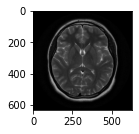

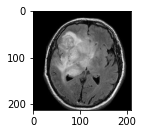

In [4]:
#showing some sample of data
img = cv2.imread('1 no.jpeg')
plt.subplot(2,1,1)
plt.imshow(img)
plt.show()

img = cv2.imread('Y2.jpg')
plt.subplot(2,1,2)
plt.imshow(img)
plt.show()

In [5]:
#Using pretrained model Densenet beacuse of its accuracy
#[3] means reading image in rgb format
densenet= DenseNet169(input_shape=image_size+[3], weights= 'imagenet',include_top=False)

In [0]:
for layers in densenet.layers:
  layers.trainable= False

In [7]:
x = GlobalAveragePooling2D()(densenet.output)
x = Dropout(0.25)(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
pred= Dense(units=2,activation='softmax')(x)

In [9]:
model= Model(input= densenet.input,outputs= pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [10]:
#using binary crossentropy as only 2 types of images are there to be classified
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
#creating image data generator for training set
train_datagen= ImageDataGenerator(rescale= 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/braintrain', target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True)

Found 210 images belonging to 2 classes.


In [0]:
#creating image data generator for test set
test_datagen= ImageDataGenerator(rescale=1./255)

In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/braintest', target_size=(224,224),batch_size=32,class_mode='categorical')

Found 43 images belonging to 2 classes.


In [15]:
#fitting the model
model.fit(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set),
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
7/7 [==============================] - 18s 3s/step - loss: 0.8993 - acc: 0.5617 - val_loss: 0.7242 - val_acc: 0.5814
Epoch 2/10
7/7 [==============================] - 2s 226ms/step - loss: 0.7957 - acc: 0.6502 - val_loss: 0.7151 - val_acc: 0.6047
Epoch 3/10
7/7 [==============================] - 3s 498ms/step - loss: 0.7180 - acc: 0.6308 - val_loss: 0.6238 - val_acc: 0.6047
Epoch 4/10
7/7 [==============================] - 4s 512ms/step - loss: 0.6324 - acc: 0.6877 - val_loss: 0.6084 - val_acc: 0.6977
Epoch 5/10
7/7 [==============================] - 3s 500ms/step - loss: 0.6109 - acc: 0.6801 - val_loss: 0.9538 - val_acc: 0.5349
Epoch 6/10
7/7 [==============================] - 4s 504ms/step - loss: 0.5390 - acc: 0.6906 - val_loss: 0.6343 - val_acc: 0.6744
Epoch 7/10
7/7 [==============================] - 4s 513ms/step - loss: 0.4755 - acc: 0.8109 - val_loss: 0.7467 - val_acc: 0.6

In [0]:
#saving the model
model.save("model1.h5")

In [24]:
#converting model to tflite format
converter= tf.lite.TFLiteConverter.from_keras_model_file('model1.h5')
tfmodel= converter.convert()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 846 variables.
INFO:tensorflow:Converted 846 variables to const ops.


In [25]:
open('model.tflite','wb').write(tfmodel)

50026788